In [1]:
#To help us perform math operations
import numpy as np
#to plot our data and model visually
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [2]:
#Step 1 - Import our data
#Input data - Of the form [X value, Y value]
data = np.loadtxt("data.csv", delimiter=",")  

In [3]:
data.shape
#100 rows and 2 columns

(100, 2)

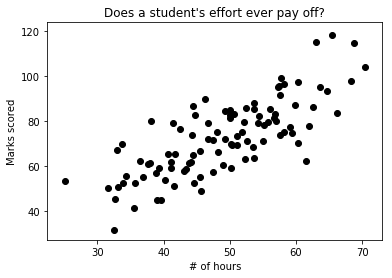

In [4]:
#Plot data
for sample in enumerate(data):
    plt.scatter(sample[1][0], sample[1][1], color='k')
plt.xlabel('# of hours')
plt.ylabel('Marks scored')
plt.title('Does a student\'s effort ever pay off?')
#plt.plot([30,70],[40,110])

Now, we have these data points on a graph. What does this do for us? A lot. We can now estimate how many hours a student who is taking this godforsaken class has to study to get the grade he/she wants! <br>Let's talk Cost function and Gradient Descent!

In [5]:
# m denotes the number of examples(number of rows) here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        # h(x) = theta(0) + theta(1) * x
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I'll include it)
        cost = np.sum(loss ** 2) / (2 * m)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta

In [6]:
#just putting data into x and y
def dataFormat(data, numOfRows):
    x = np.zeros(shape=(numOfRows, 2))
    y = np.zeros(shape=numOfRows)
    for i, sample in enumerate(data):
        x[i][0] = 1
        x[i][1] = sample[0]
        # our target variable
        y[i] = sample[1]
    return x, y

In [7]:
def predict(x,theta): 
    return theta[0] + theta[1] * x

In [8]:
x, y = dataFormat(data,len(data))
m, n = np.shape(x)
#hyperparameters 
numIterations= 10000
alpha = 0.0001
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)

[ 1.26761621  1.4545775 ]


In [9]:
predict(70,theta)

103.08804086260979

In [10]:
def getY(x, theta): 
    return theta[0] + theta[1] * x

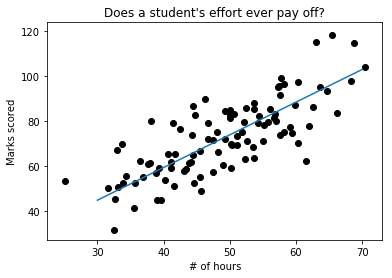

In [11]:
for sample in enumerate(data):
    plt.scatter(sample[1][0], sample[1][1], color='k')
plt.xlabel('# of hours')
plt.ylabel('Marks scored')
plt.title('Does a student\'s effort ever pay off?')
plt.plot([30,70],[getY(30,theta),getY(70, theta)])